## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')           # To ignore the warnings

# Display all the columns of the file (since there are 104 features/columns)
pd.set_option('display.max_columns', None)

## Reading the .csv file

In [2]:
data = pd.read_csv('players_20.csv')

In [3]:
df = pd.DataFrame(data)
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

## EDA

In [4]:
df.shape

(18278, 104)

In [5]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [6]:
pd.set_option('display.max_rows', None)
df.dtypes

sofifa_id                       int64
player_url                     object
short_name                     object
long_name                      object
age                             int64
dob                            object
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
body_type                      object
real_face                      object
release_clause_eur            float64
player_tags                    object
team_position                  object
team_jersey_number            float64
loaned_from 

### a) Univariate analysis

#### 1) Nationalities

In [7]:
nationality_values = df['nationality'].value_counts()[:10].values
nationality_labels = df['nationality'].value_counts()[:10].index

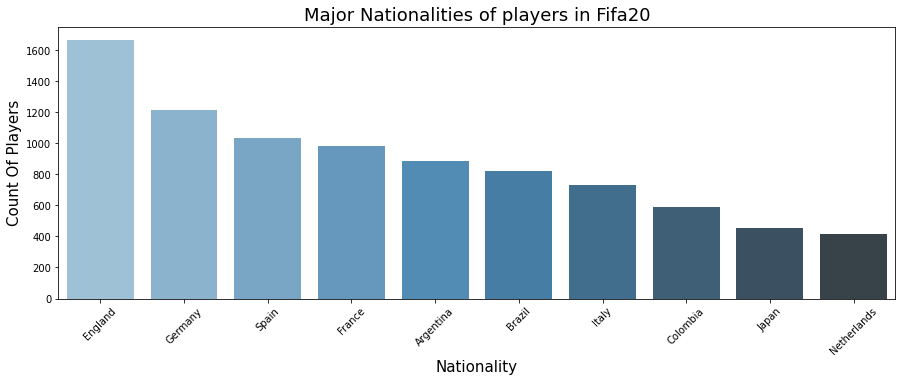

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(nationality_labels, nationality_values, data=df, palette='Blues_d')
plt.title('Major Nationalities of players in Fifa20', fontsize=18)
plt.xlabel("Nationality", fontsize=15)
plt.ylabel("Count Of Players", fontsize=15)
plt.xticks(rotation=45)
plt.show()

As can be seen, **majority of the players belong to the above 10 nationalities with England being the major nationality followed by Germany, Spain, France & Argentina** among the first 5.

#### 2) Height distribution

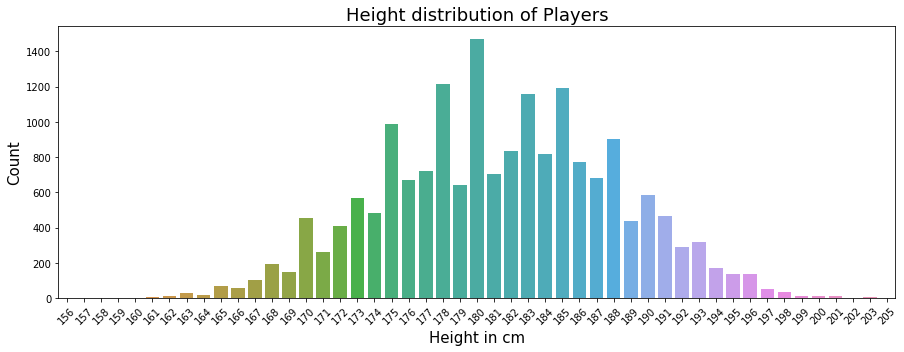

In [9]:
plt.figure(figsize=(15,5))
sns.countplot('height_cm', data=df)
plt.title('Height distribution of Players', fontsize=18)
plt.xlabel("Height in cm", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [10]:
# Avg. height of the players
df['height_cm'].mean()

181.36218404639456

Height of the players is **normally distributed** with **avg. height of the distribution being 181.36 cm**. 

#### 3) Weight distribution

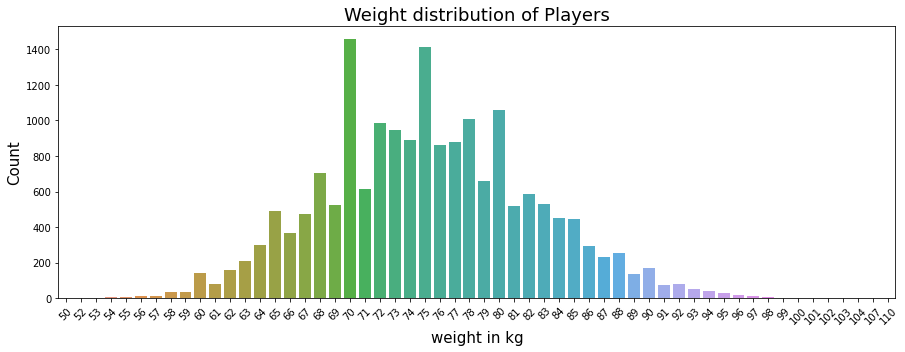

In [11]:
plt.figure(figsize=(15,5))
sns.countplot('weight_kg', data=df)
plt.title('Weight distribution of Players', fontsize=18)
plt.xlabel("weight in kg", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [12]:
# Avg. weight of the players
df['weight_kg'].mean()

75.2763431447642

Weight of the players is **normally distributed** with **avg. weight of the distribution being 75.27 kg**.

#### 4) Preferred foot

In [13]:
preferred_foot_labels = df["preferred_foot"].value_counts().index
preferred_foot_values = df["preferred_foot"].value_counts().values

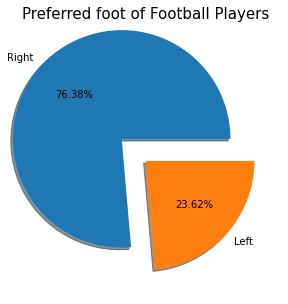

In [14]:
plt.figure(figsize = (7,5))
explode = (0.3, 0)
plt.pie(preferred_foot_values, labels=preferred_foot_labels, explode=explode, autopct='%1.2f%%', shadow=True)
plt.title('Preferred foot of Football Players', fontsize = 15)
plt.show()

Majority of the players prefer **right foot (76%)** to play compared to **left foot (24%)**.

#### 5) Age distribution

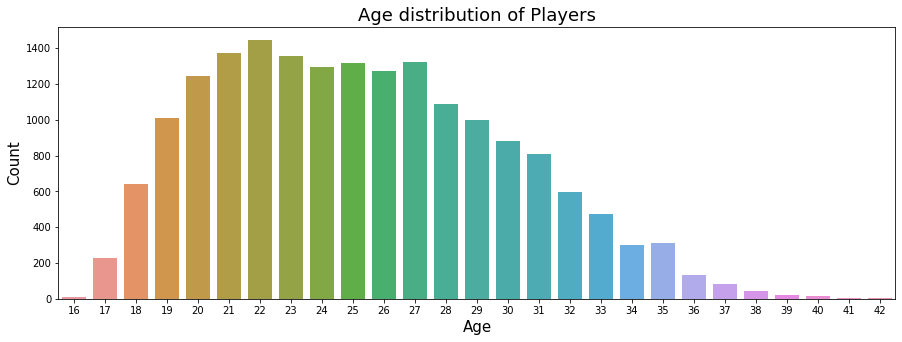

In [15]:
plt.figure(figsize=(15,5))
sns.countplot('age', data=df)
plt.title('Age distribution of Players', fontsize=18)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [16]:
df['age'].skew()

0.38061976075931975

In [17]:
df['age'].mean()              # effect of skewness

25.283291388554545

In [18]:
# Avg. weight of the players
df['age'].median()

25.0

In [19]:
df['age'].quantile([0.25, 0.75])

0.25    22.0
0.75    29.0
Name: age, dtype: float64

The age distribution is **slightly positively skewed**. Majority portion of the players are in the age group of **22-29** with **avg. age of the players being 25**.

#### 6) Work rates of players

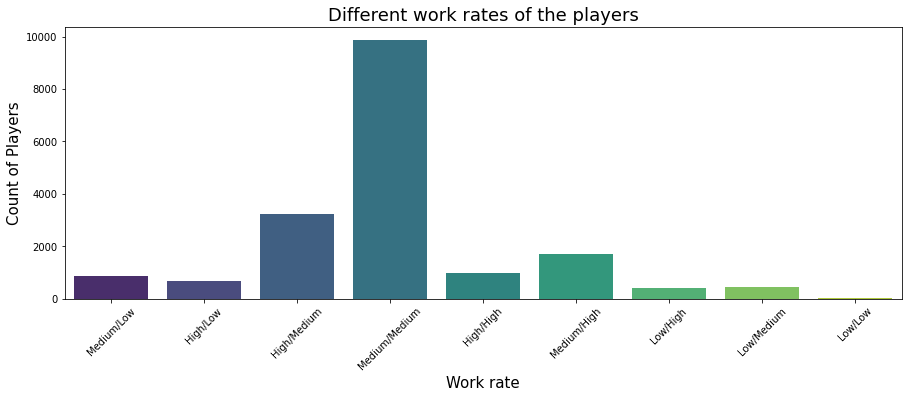

In [20]:
plt.figure(figsize = (15,5))
sns.countplot('work_rate', data=df, palette='viridis')
plt.xlabel('Work rate', fontsize = 15)
plt.ylabel('Count of Players', fontsize = 15)
plt.title('Different work rates of the players', fontsize = 18)
plt.xticks(rotation=45)
plt.show()

1. Work rate: Player's ability in terms of attack & defence. Can be split into 2 separate features --> **Attacking work rate (AWR)** & **Defending work rate (DWR)**.
2. Above graph shows that the maximum players exhibit **Medium/Medium work rate** i.e. **Medium AWR** & **Medium DWR** skills.

#### 7) Body type of Players

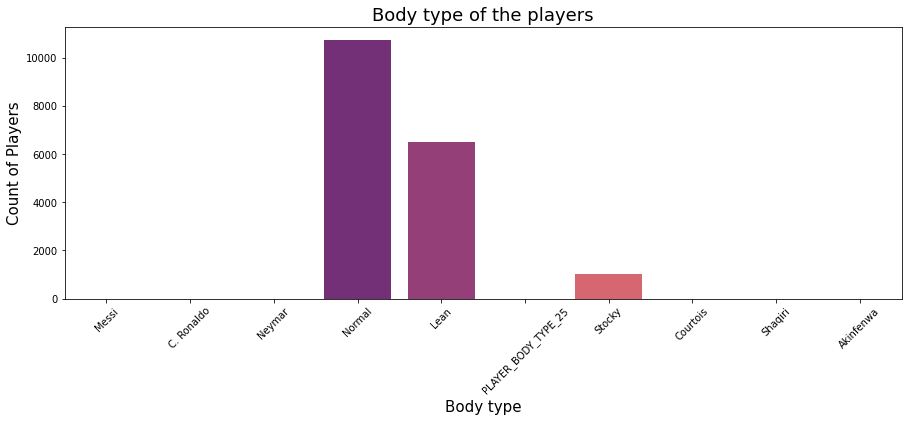

In [21]:
plt.figure(figsize = (15,5))
sns.countplot('body_type', data=df, palette='magma')
plt.xlabel('Body type', fontsize = 15)
plt.ylabel('Count of Players', fontsize = 15)
plt.title('Body type of the players', fontsize = 18)
plt.xticks(rotation=45)
plt.show()

Above graph illustrates the different body types of the players. As can be seen, body types of the players are majorly classified into **'normal'**, **'lean'** & **'stocky'**. The rest of the body types can be grouped into a new category **'Others'** in FE part. 

### Bivariate analysis

#### 1) Wages of the players

In [22]:
wages = df.sort_values(by='wage_eur', ascending=False).head(15)

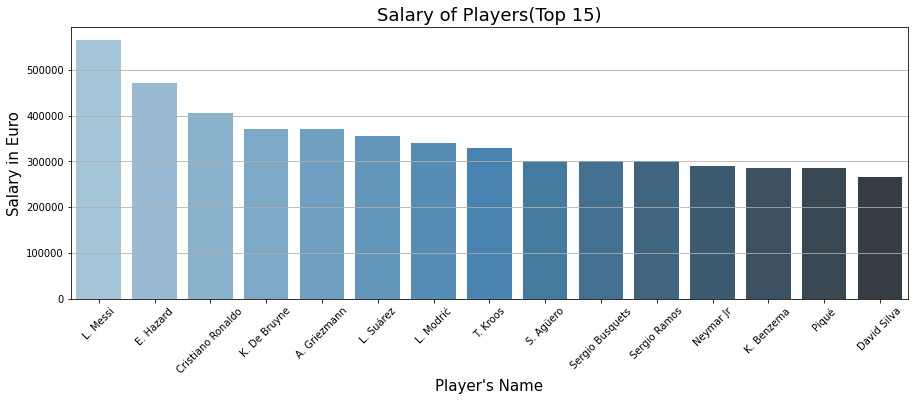

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(x=wages['short_name'], y=wages['wage_eur'], data=wages, palette="Blues_d")
plt.title('Salary of Players(Top 15)', fontsize=18)
plt.xlabel("Player's Name", fontsize=15)
plt.ylabel("Salary in Euro", fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Above is the illustration of players with highest wages with **'Lionel Messi' being the highest paid player in Fifa20** followed by **'E. Hazard'**, **'Cristiano Ronaldo'**, **'K. De. Brunye'** & **'A. Griezmann'**.

#### 2) Top performing 'Countries' & 'Clubs' in Fifa20 based on Overall

In [24]:
top_countries = df.groupby(['nationality']).overall.mean().round(2).sort_values(ascending = False)[:10]

In [25]:
top_clubs = df.groupby(['club']).overall.mean().round(2).sort_values(ascending = False)[:10]

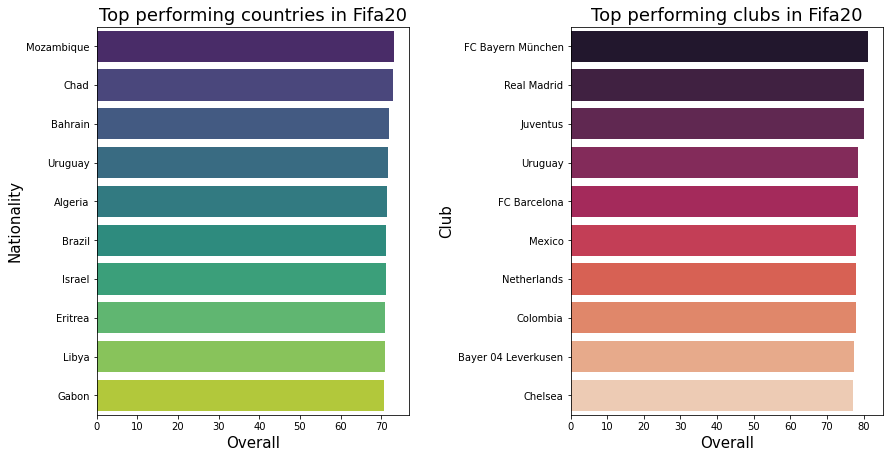

In [26]:
plt.figure(figsize=(13,7))
plt.subplot(1, 2, 1)
sns.barplot(x = top_countries, y = top_countries.index, palette='viridis')
plt.title('Top performing countries in Fifa20', fontsize=18)
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Nationality', fontsize=15)

plt.subplot(1, 2, 2)
sns.barplot(x = top_clubs, y = top_clubs.index, palette='rocket')
plt.title('Top performing clubs in Fifa20', fontsize=18)
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Club', fontsize=15)

plt.tight_layout(pad=3)

#### 3) Nationalities with higher avg. salaries of players

In [27]:
# Nationalities whose players have higher avg. salaries
df[['nationality', 'wage_eur']].groupby(['nationality'], dropna=True).mean().round(2).sort_values(by='wage_eur', 
                                                                                                  ascending=False)[:10]

,wage_eur
nationality,
Dominican Republic,38250.00
Armenia,23500.00
Gabon,22125.00
Algeria,21840.00
Syria,21500.00
Croatia,19619.05
Chad,19000.00
Central African Rep.,17000.00
Belgium,16973.88


#### 4) Clubs with higher avg. salaries of players

In [28]:
# Clubs whose players have higher avg. salaries
df[['club', 'wage_eur']].groupby(['club'], dropna=True).mean().round(2).sort_values(by='wage_eur', 
                                                                                    ascending=False)[:10]

,wage_eur
club,
Real Madrid,162242.42
FC Barcelona,150000.00
Manchester City,120727.27
Juventus,113636.36
FC Bayern München,109391.30
Manchester United,87090.91
Chelsea,85030.30
Liverpool,80818.18
Tottenham Hotspur,78878.79


#### 5) Age vs Overall & Potential

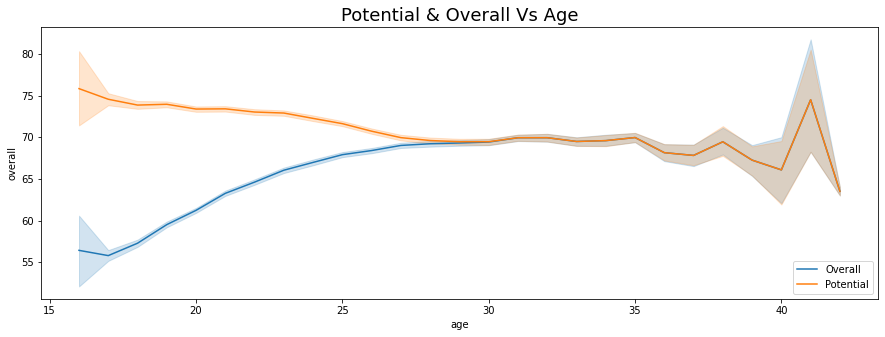

In [29]:
plt.figure(figsize=(15,5))
ax1 = sns.lineplot('age', 'overall', data=df, label='Overall')
ax2 = sns.lineplot('age', 'potential', data=df, label='Potential')
plt.title('Potential & Overall Vs Age', fontsize = 18)
plt.legend(loc='lower right')
plt.show()

1. As the player's age increases, the Overall rating of the player seems to slightly increase which is understandable as the player plays more matches & gains experience.
2. As for potential, as the age of the player increases, player's potential decreases which seems logical as with age, player traits such as pace, agility, stamina decreases which affects player's performance. That means young players have more potential due to their high stamina, agility & strength comapred to older players.
3. For players with ages greater than 29, Overall & Potential are identical.

#### 6) Potential Vs Overall

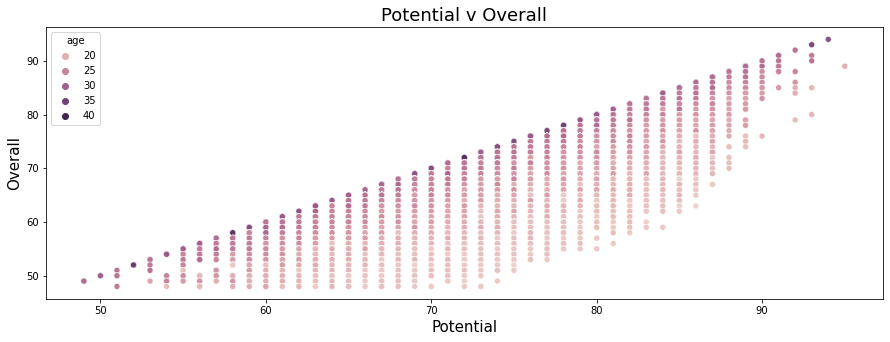

In [30]:
plt.figure(figsize=(15,5))
sns.scatterplot('potential', 'overall', hue='age', data=df)
plt.title('Potential v Overall', fontsize = 18)
plt.xlabel('Potential', fontsize = 15)
plt.ylabel('Overall', fontsize = 15)
plt.show()

Overall rating is almost proportional to Potential of the players more likely to be seen in older players than younger ones as can be confirmed from the graph above.

### Multivariate analysis

#### 1) Salary of players of top performing countries

In [31]:
salary_top_countries = df.groupby(['nationality'], dropna=True)['overall','wage_eur'].mean().round(2).sort_values(by='overall', 
                                                                                                        ascending=False)[:10]

In [32]:
salary_top_countries.index

Index(['Mozambique', 'Chad', 'Bahrain', 'Uruguay', 'Algeria', 'Brazil',
       'Israel', 'Eritrea', 'Libya', 'Gabon'],
      dtype='object', name='nationality')

In [33]:
salary_top_countries['wage_eur'].values

array([14750.  , 19000.  ,  1000.  , 14597.56, 21840.  , 16646.84,
       12375.  ,  7000.  ,  4750.  , 22125.  ])

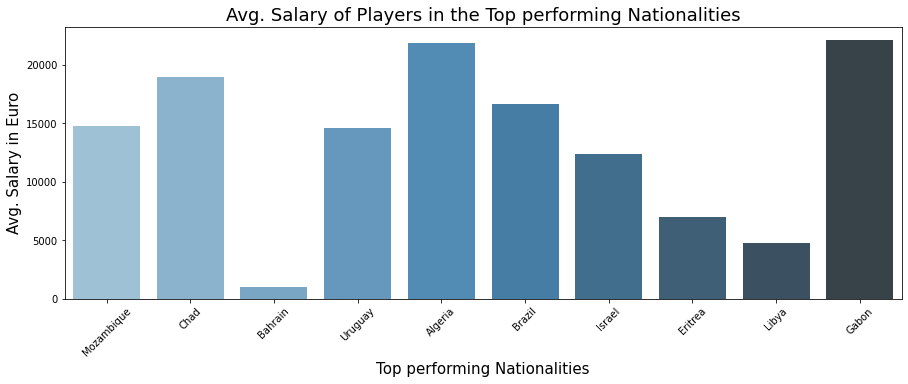

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x=salary_top_countries.index, y=salary_top_countries['wage_eur'].values, data=salary_top_countries, 
            palette="Blues_d")
plt.title('Avg. Salary of Players in the Top performing Nationalities', fontsize=18)
plt.xlabel("Top performing Nationalities", fontsize=15)
plt.ylabel("Avg. Salary in Euro", fontsize=15)
plt.xticks(rotation=45)
plt.show()

Amongst the top performing countries, players from **Gabon** have the highest salaries.

#### 2) Salary of players of top performing clubs

In [35]:
salary_top_clubs = df.groupby(['club'], dropna=True)['overall','wage_eur'].mean().round(2).sort_values(by='overall', 
                                                                                                        ascending=False)[:10]

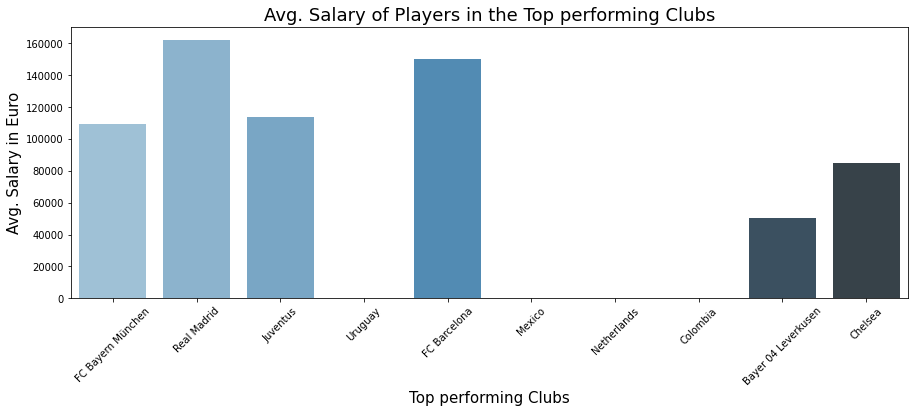

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x=salary_top_clubs.index, y=salary_top_clubs['wage_eur'].values, data=salary_top_clubs, palette="Blues_d")
plt.title('Avg. Salary of Players in the Top performing Clubs', fontsize=18)
plt.xlabel("Top performing Clubs", fontsize=15)
plt.ylabel("Avg. Salary in Euro", fontsize=15)
plt.xticks(rotation=45)
plt.show()

Amongst the top performing clubs, players of **Real Madrid** have the highest salaries.

In [37]:
df[df['wage_eur'] == 0].head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
327,245309,https://sofifa.com/player/245309/egidio-maestr...,E. Schetino,Egidio Maestre Schetino,27,1992-02-29,185,80,Uruguay,Uruguay,82,82,0,0,CB,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCB,4.0,80.0,43.0,56.0,65.0,83.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,38,83,74,44,56,45,49,61,72,83,78,77,85,68,53,69,76,73,41,86,82,38,42,56,71,84,85,76,58,40,64,56,43,59+2,59+2,59+2,59+2,59+2,59+2,59+2,59+2,60+2,60+2,60+2,61+2,64+2,64+2,64+2,61+2,73+2,76+2,76+2,76+2,73+2,76+2,80+2,80+2,80+2,76+2
328,245313,https://sofifa.com/player/245313/jose-maria-si...,J. Sildero,José María Sildero,27,1992-02-29,177,75,Uruguay,Uruguay,82,82,0,0,"CAM, RM",Right,1,4,4,Medium/Low,Normal,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RM,17.0,81.0,77.0,81.0,82.0,40.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",75,74,64,83,76,83,86,78,82,80,88,75,83,82,76,82,64,80,70,78,62,40,80,83,77,81,40,35,33,12,12,13,15,13,77+2,77+2,77+2,80+2,80+2,80+2,80+2,80+2,81+2,81+2,81+2,80+2,77+2,77+2,77+2,80+2,63+2,62+2,62+2,62+2,63+2,59+2,52+2,52+2,52+2,59+2
407,245299,https://sofifa.com/player/245299/jaime-nicolas...,J. Frendado,Jaime Nicolás Frendado,35,1984-02-29,181,82,Uruguay,Uruguay,81,81,0,0,"CB, CDM",Right,1,3,2,High/Medium,Normal,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCB,5.0,71.0,61.0,57.0,62.0,82.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,Long Passer (CPU AI Only),40,56,80,67,63,60,72,58,58,64,67,74,61,76,63,74,91,60,77,61,86,82,58,50,62,70,83,82,82,58,62,54,71,48,66+2,66+2,66+2,60+2,63+2,63+2,63+2,60+2,61+2,61+2,61+2,60+2,63+2,63+2,63+2,60+2,69+2,72+2,72+2,72+2,69+2,72+2,80+2,80+2,80+2,72+2
408,245304,https://sofifa.com/player/245304/saul-marcelo-...,S. Ardero,Saúl Marcelo Ardero,31,1988-02-29,171,63,Uruguay,Uruguay,81,81,0,0,"CAM, LM, LW",Left,1,5,4,Medium/Medium,Lean,No,NaN,#Acrobat,NaN,NaN,NaN,NaN,NaN,LM,16.0,82.0,72.0,77.0,83.0,26.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Crowd Favourite",73,72,44,79,67,82,56,75,80,82,86,78,89,80,88,67,44,67,48,75,41,31,82,80,74,77,31,13,23,9,7,8,14,10,72+2,72+2,72+2,79+2,78+2,78+2,78+2,79+2,80+2,80+2,80+2,79+2,73+2,73+2,73+2,79+2,57+2,53+2,53+2,53+2,57+2,51+2,39+2,39+2,39+2,51+2
409,245305,https://sofifa.com/player/245305/luis-roberto-...,L. Dálves,Luis Roberto Dálves,27,1992-02-29,188,83,Uruguay,Uruguay,81,81,0,0,"ST, CF",Right,1,3,3,High/Low,Normal,No,NaN,#Strength,NaN,NaN,NaN,NaN,NaN,ST,9.0,80.0,82.0,60.0,71.0,34.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Long Passer (CPU AI Only)",56,82,83,68,79,74,59,67,47,73,79,81,55,83,55,84,84,56,87,80,65,32,81,58,77,79,28,27,24,8,11,20,19,20,80+2,80+2,80+2,73+2,76+2,76+2,76+2,73+2,71+2,71+2,71+2,70+2,63+2,63+2,63+2,70+2,53+2,51+2,51+2,51+2,53+2,51+2,51+2,51+2,51+2,51+2


'Wages' feature is required just for analysis, not for model building as the aim of this project is to cluster the players based on their skills & not on their wages or overall rating, hence can be dropped off before model building.

#### 3) Top 10 Players with best performance based on Overall

In [38]:
Top_players = df.sort_values(by='overall', ascending=False).head(15)

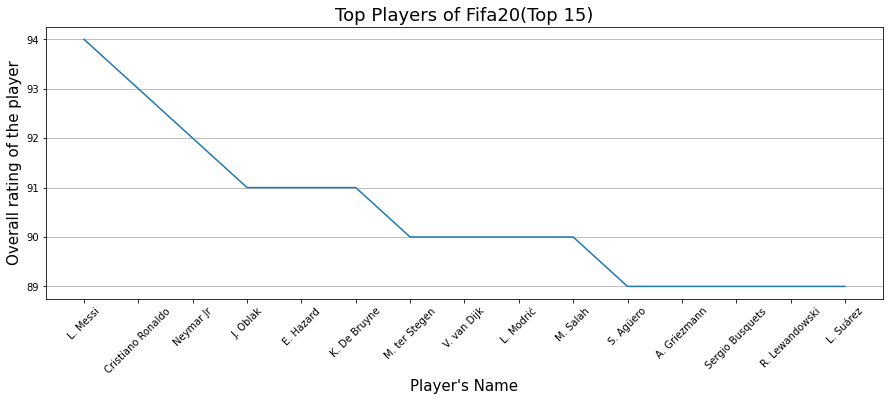

In [39]:
plt.figure(figsize=(15,5))
sns.lineplot(x=Top_players['short_name'], y=Top_players['overall'], data=wages, palette="Blues_d")
plt.title('Top Players of Fifa20(Top 15)', fontsize=18)
plt.xlabel("Player's Name", fontsize=15)
plt.ylabel("Overall rating of the player", fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Lionel Messi has the highest Overall rating** of **94** in Fifa20 followed by **Cristiano Ronaldo**, **Neymar Jr.**, **J.Oblak** & **Eden Hazard**.

In [40]:
numeric_featues = [feature for feature in df.columns if df[feature].dtype != 'object']
numeric_featues

['sofifa_id',
 'age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'release_clause_eur',
 'team_jersey_number',
 'contract_valid_until',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'ment

In [41]:
gk_df = df[['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','goalkeeping_diving',
            'goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']]

<AxesSubplot:>

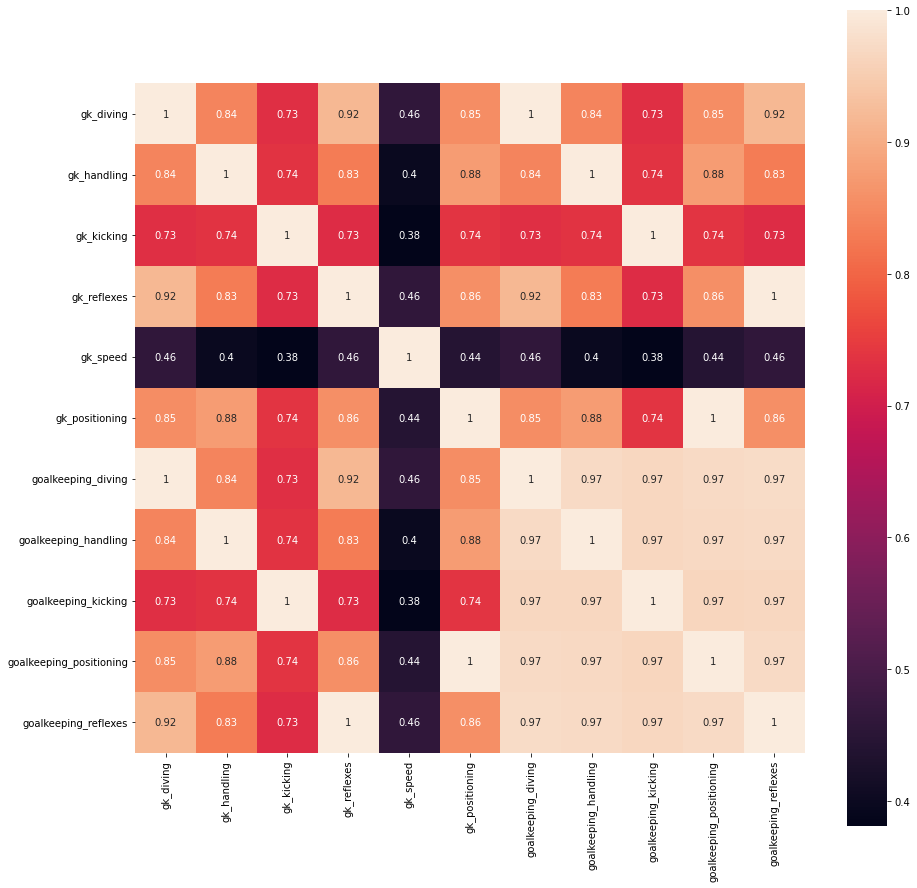

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(gk_df.corr(), annot=True, square=True)

1. Features **'gk_diving'**,**'gk_handling'**,**'gk_kicking'**,**'gk_reflexes'**,**'gk_speed'** & **'gk_positioning'** are highly collinear to features **'goalkeeping_diving'**,**'goalkeeping_handling'**,**'goalkeeping_kicking'**,**'goalkeeping_positioning'**,**'goalkeeping_reflexes'** & either of the 2 set of features can be dropped off.
2. In this case, 'gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed' & 'gk_positioning' have around **88% null values** so this set can be dropped off (in FE).

## Data cleaning & pre-processing

In [43]:
df.columns[:60]

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_

In [44]:
df.columns[61:]

Index(['power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb'],
      dtype='object')

In [45]:
print('Percentage of Missing values in features')
print("-"*75)
for feature in df.columns:
    if df[feature].isnull().sum() > 0:
        print(feature+': ', df[feature].isnull().mean().round(4), '%')

Percentage of Missing values in features
---------------------------------------------------------------------------
release_clause_eur:  0.071 %
player_tags:  0.918 %
team_position:  0.0131 %
team_jersey_number:  0.0131 %
loaned_from:  0.9427 %
joined:  0.0705 %
contract_valid_until:  0.0131 %
nation_position:  0.9384 %
nation_jersey_number:  0.9384 %
pace:  0.1114 %
shooting:  0.1114 %
passing:  0.1114 %
dribbling:  0.1114 %
defending:  0.1114 %
physic:  0.1114 %
gk_diving:  0.8886 %
gk_handling:  0.8886 %
gk_kicking:  0.8886 %
gk_reflexes:  0.8886 %
gk_speed:  0.8886 %
gk_positioning:  0.8886 %
player_traits:  0.5861 %
ls:  0.1114 %
st:  0.1114 %
rs:  0.1114 %
lw:  0.1114 %
lf:  0.1114 %
cf:  0.1114 %
rf:  0.1114 %
rw:  0.1114 %
lam:  0.1114 %
cam:  0.1114 %
ram:  0.1114 %
lm:  0.1114 %
lcm:  0.1114 %
cm:  0.1114 %
rcm:  0.1114 %
rm:  0.1114 %
lwb:  0.1114 %
ldm:  0.1114 %
cdm:  0.1114 %
rdm:  0.1114 %
rwb:  0.1114 %
lb:  0.1114 %
lcb:  0.1114 %
cb:  0.1114 %
rcb:  0.1114 %
rb:  0.1

In [46]:
print('Percentage of Missing values in features greater than 50%')
print("-"*75)
for feature in df.columns:
    if df[feature].isnull().sum() >= (0.5*len(df)):
        print(feature+': ', df[feature].isnull().mean().round(4), '%')

Percentage of Missing values in features greater than 50%
---------------------------------------------------------------------------
player_tags:  0.918 %
loaned_from:  0.9427 %
nation_position:  0.9384 %
nation_jersey_number:  0.9384 %
gk_diving:  0.8886 %
gk_handling:  0.8886 %
gk_kicking:  0.8886 %
gk_reflexes:  0.8886 %
gk_speed:  0.8886 %
gk_positioning:  0.8886 %
player_traits:  0.5861 %


In [47]:
for feature in df.columns:
    if df[feature].nunique() >= (0.5*len(df)):
        print(feature+':', df[feature].nunique())

sofifa_id: 18278
player_url: 18278
short_name: 17354
long_name: 18218


1. Features such as **'player_tags', 'loaned_from', 'nation_position', 'nation_jersey_number'** can be dropped off as they have more than 90% of null values.
2. For the features, **'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning'**, since these have  around 88% missing values & highly collinear to other features, as seen from the heatmap above, can be dropped off. 
3. Features such as **'sofifa_id', 'player_url' & 'long_name'** have a large number of unique values & hence add no value to the analysis or model building. Hence can be dropped off.
4. Features, such as **'dob', 'real_face', 'player_traits', 'value_eur', 'release_clause_eur', 'joined' & 'contract_valid_until' & 'team_jersey_number'** although have no null values or large number of unique values, they don't add any significant value to train the algorithm as the requirement of the project is to cluster players based on their skills. Hence can be dropped off.
5. Features such as **'short_name', 'nationality', 'club', 'overall', 'international_reputation' & 'wage_eur'** were important for analysis but are not required for model building as they can add bias to the model. Hence can be dropped off.

In [48]:
# Dropping the useless features
df.drop(['sofifa_id','player_url','long_name','dob','value_eur','real_face','player_traits','release_clause_eur',
         'player_tags', 'loaned_from','nation_position','nation_jersey_number','team_jersey_number','gk_diving', 
         'gk_handling', 'gk_kicking',  'gk_reflexes', 'gk_speed', 'gk_positioning', 'short_name', 'nationality', 
         'club', 'wage_eur', 'joined', 'contract_valid_until', 'overall', 'international_reputation'], axis=1, inplace=True)
df.head(3)

,age,height_cm,weight_kg,potential,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,170,72,94,"RW, CF, ST",Left,4,4,Medium/Low,Messi,RW,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,34,187,83,93,"ST, LW",Right,4,5,High/Low,C. Ronaldo,LW,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,27,175,68,92,"LW, CAM",Right,5,5,High/Medium,Neymar,CAM,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


## Categorical variables

In [49]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'object']
print('Number of categorical variables: ', len(categorical_features))
categorical_features

Number of categorical variables:  31


['player_positions',
 'preferred_foot',
 'work_rate',
 'body_type',
 'team_position',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb']

#### 1) Handling incorrect datatypes

1. Features such as 'ls', 'st', 'rs',....etc. are positional skills which show the ability of the players to play in that specific position rated between 1-99. This is basically a numeric feature & need to be converted into it.
2. First of all, either the arithmetic sum of the values can be taken or the first part can be extracted as the values of these features.
3. Here, the first part of the string is extracted to get a correct value for our features. 
4. Later on we'll be converting the datatype of these features from object to int.

In [50]:
positional_columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 
                      'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

In [51]:
for feature in positional_columns:
    df[feature] = df[feature].str.split('+').str[0]
df.head(3)

,age,height_cm,weight_kg,potential,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,170,72,94,"RW, CF, ST",Left,4,4,Medium/Low,Messi,RW,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,34,187,83,93,"ST, LW",Right,4,5,High/Low,C. Ronaldo,LW,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,27,175,68,92,"LW, CAM",Right,5,5,High/Medium,Neymar,CAM,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61


In [52]:
# Checking null values before changing the datatype to 'int' 
for feature in positional_columns:
    if df[feature].isnull().sum() > 0:
        print(feature+': ', df[feature].isnull().sum())

ls:  2036
st:  2036
rs:  2036
lw:  2036
lf:  2036
cf:  2036
rf:  2036
rw:  2036
lam:  2036
cam:  2036
ram:  2036
lm:  2036
lcm:  2036
cm:  2036
rcm:  2036
rm:  2036
lwb:  2036
ldm:  2036
cdm:  2036
rdm:  2036
rwb:  2036
lb:  2036
lcb:  2036
cb:  2036
rcb:  2036
rb:  2036


In [53]:
# Filling the null values with '0'
for feature in positional_columns:
    if df[feature].isnull().sum() > 0:
        df[feature] = df[feature].fillna(0)
df.head(3)

,age,height_cm,weight_kg,potential,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,170,72,94,"RW, CF, ST",Left,4,4,Medium/Low,Messi,RW,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,34,187,83,93,"ST, LW",Right,4,5,High/Low,C. Ronaldo,LW,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,27,175,68,92,"LW, CAM",Right,5,5,High/Medium,Neymar,CAM,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61


In [54]:
for feature in positional_columns:
    if df[feature].isnull().sum() > 0:
        print(feature+': ', df[feature].isnull().sum())

In [55]:
[feature for feature in positional_columns if df[feature].dtypes == 'object']

['ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb']

In [56]:
# Changing the dtype to 'int'
for feature in positional_columns:
    df[feature] = df[feature].astype(int)
[feature for feature in positional_columns if df[feature].dtypes == 'object']

[]

In [57]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'object']
print('Number of categorical variables: ', len(categorical_features))
categorical_features

Number of categorical variables:  5


['player_positions',
 'preferred_foot',
 'work_rate',
 'body_type',
 'team_position']

#### 2) Handling Null values

In [58]:
for feature in categorical_features:
    if df[feature].isnull().sum() > 0:
        print(feature+': ', df[feature].isnull().sum())

team_position:  240


In [59]:
# Using 'player_positions' to fill the null values in 'team_position' using the 1st position value
df['player_positions'].str.split(',').str[0].head()

0    RW
1    ST
2    LW
3    GK
4    LW
Name: player_positions, dtype: object

In [60]:
df['team_position'] = df['team_position'].fillna(df['player_positions'].str.split(',').str[0])
df.head(3)

,age,height_cm,weight_kg,potential,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,170,72,94,"RW, CF, ST",Left,4,4,Medium/Low,Messi,RW,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,34,187,83,93,"ST, LW",Right,4,5,High/Low,C. Ronaldo,LW,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,27,175,68,92,"LW, CAM",Right,5,5,High/Medium,Neymar,CAM,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61


In [61]:
df['team_position'].isnull().sum()

0

#### 3) Handling high cardinality

In [62]:
df['team_position'].unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES',
       'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', 'RWB', 'LWB'],
      dtype=object)

In [63]:
df[df['team_position'] == 'SUB'].head()

,age,height_cm,weight_kg,potential,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
48,32,169,61,87,"CF, ST",Right,4,4,High/Low,Normal,SUB,88.0,83.0,80.0,91.0,35.0,53.0,79,86,40,82,70,91,82,79,74,89,93,83,94,88,92,80,59,73,39,81,59,36,87,83,79,81,25,40,40,7,10,8,10,4,78,78,78,86,85,85,85,86,85,85,85,85,78,78,78,85,65,60,60,60,65,60,46,46,46,60
53,32,185,80,87,GK,Right,3,1,Medium/Medium,Normal,SUB,NaN,NaN,NaN,NaN,NaN,NaN,11,15,11,30,11,16,11,15,37,19,54,53,60,84,61,56,74,39,75,13,32,20,16,68,25,67,28,14,14,90,81,75,82,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55,23,183,75,92,LW,Left,3,4,High/Medium,Lean,SUB,95.0,81.0,79.0,86.0,38.0,70.0,83,81,72,80,85,88,83,82,64,85,93,96,86,81,80,87,64,78,70,78,61,34,84,82,71,80,36,32,35,8,12,9,9,14,82,82,82,84,84,84,84,84,83,83,83,83,74,74,74,83,65,59,59,59,65,61,52,52,52,61
59,25,182,75,89,CB,Left,3,2,Medium/High,Normal,SUB,69.0,63.0,69.0,69.0,86.0,82.0,61,51,79,80,65,64,72,62,73,77,66,72,62,82,66,83,88,71,86,74,82,87,51,58,61,82,87,88,85,15,10,14,12,15,68,68,68,66,67,67,67,66,67,67,67,67,72,72,72,67,77,80,80,80,77,79,84,84,84,79
62,27,176,79,87,"CAM, CM, LW",Right,3,4,Medium/Low,Normal,SUB,71.0,77.0,83.0,91.0,59.0,60.0,78,79,55,84,67,92,88,76,80,93,74,68,85,76,90,69,61,62,59,84,58,61,79,87,76,86,58,64,51,10,8,12,15,6,76,76,76,83,82,82,82,83,84,84,84,81,81,81,81,81,70,70,70,70,70,67,62,62,62,67


In [64]:
df[df['team_position'] == 'RES'].head()

,age,height_cm,weight_kg,potential,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
93,26,181,75,86,ST,Right,4,3,Medium/Low,Normal,RES,75.0,84.0,61.0,77.0,36.0,69.0,46,89,88,73,85,75,58,45,54,80,76,75,75,85,76,84,94,67,73,70,56,22,92,64,82,79,45,24,20,13,9,5,7,9,83,83,83,75,79,79,79,75,76,76,76,73,67,67,67,73,53,52,52,52,53,51,50,50,50,51
201,38,185,84,83,GK,Left,2,1,Medium/Medium,Normal,RES,NaN,NaN,NaN,NaN,NaN,NaN,13,12,25,21,14,25,25,13,22,23,56,55,60,79,46,46,77,41,70,13,23,22,16,62,24,70,24,11,13,85,75,61,86,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
215,32,189,90,83,"CM, CDM",Right,4,2,Medium/High,Normal,RES,51.0,74.0,78.0,77.0,80.0,80.0,72,68,76,85,78,80,64,60,81,83,48,53,55,84,54,82,66,68,87,78,82,84,78,78,68,84,80,82,74,11,9,5,15,8,75,75,75,74,76,76,76,74,77,77,77,74,80,80,80,74,75,81,81,81,75,75,80,80,80,75
252,24,190,84,86,CB,Right,3,2,Low/Medium,Lean,RES,64.0,39.0,55.0,64.0,85.0,74.0,40,33,84,69,35,64,45,25,65,65,61,66,61,78,55,58,83,67,78,39,72,86,28,50,36,70,86,86,82,5,10,5,5,5,55,55,55,55,55,55,55,55,57,57,57,57,63,63,63,57,71,75,75,75,71,73,81,81,81,73
294,33,195,90,82,GK,Left,2,1,Medium/Medium,Stocky,RES,NaN,NaN,NaN,NaN,NaN,NaN,12,17,13,36,13,18,14,16,37,22,30,33,35,74,32,57,66,29,58,18,18,10,10,60,21,64,27,10,12,83,84,76,81,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


'Player_positions' can be used to replace the 'team_position' values having 'SUB' & 'RES' values.

In [65]:
df['team_position'] = np.where(df['team_position'] == 'SUB', df['player_positions'].str.split(',').str[0], df['team_position'])
df['team_position'] = np.where(df['team_position'] == 'RES', df['player_positions'].str.split(',').str[0], df['team_position'])

In [66]:
df['team_position'].unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'LB', 'LS', 'CB', 'RB', 'RDM', 'RAM',
       'RS', 'RF', 'CM', 'LF', 'LAM', 'RWB', 'LWB'], dtype=object)

In [67]:
# To handle the high cardinality

def player_team_position(df):
    if ((df['team_position'] == 'RWB') | (df['team_position'] == 'LWB') | (df['team_position'] == 'LCB') | 
          (df['team_position'] == 'RCB') | (df['team_position'] == 'RB') | (df['team_position'] == 'LB') | 
          (df['team_position'] == 'CB')):
        return 'DF'
    elif ((df['team_position'] == 'RDM') | (df['team_position'] == 'LDM') | (df['team_position'] == 'CDM') |
         (df['team_position'] == 'RCM') | (df['team_position'] == 'LCM') | (df['team_position'] == 'CAM') |
         (df['team_position'] == 'RAM') | (df['team_position'] == 'LAM') | (df['team_position'] == 'CM') |
         (df['team_position'] == 'RM') | (df['team_position'] == 'LM') | (df['team_position'] == 'RW') | 
         (df['team_position'] == 'LW')):
        return 'MF'
    elif ((df['team_position'] == 'CF') | (df['team_position'] == 'LF') | (df['team_position'] == 'RF') |
         (df['team_position'] == 'RS') | (df['team_position'] == 'LS') | (df['team_position'] == 'ST')):
        return 'FW'
    else:
        return 'GK'

df['team_position'] = df.apply(player_team_position, axis=1)

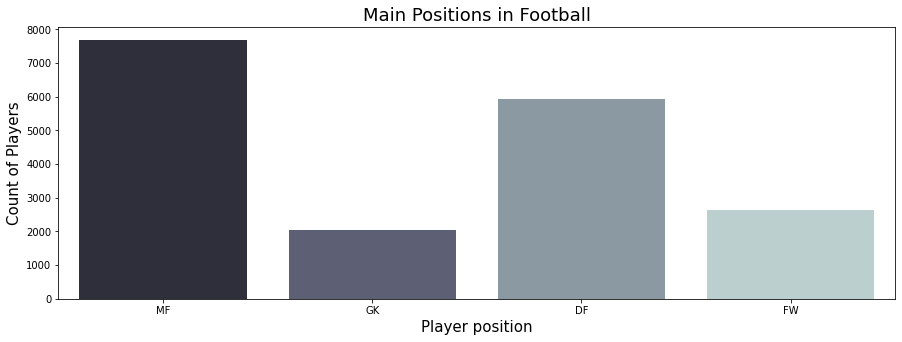

In [68]:
plt.figure(figsize = (15,5))
sns.countplot('team_position', data = df, palette = 'bone')
plt.xlabel('Player position', fontsize = 15)
plt.ylabel('Count of Players', fontsize = 15)
plt.title('Main Positions in Football', fontsize = 18)
plt.show()

Above graph visualizes the number of players in each position in which most of the players are midfielders followed by defenders, forwards and a smaller number of goalkeepers. 

In [69]:
df['body_type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Normal', 'Lean',
       'PLAYER_BODY_TYPE_25', 'Stocky', 'Courtois', 'Shaqiri',
       'Akinfenwa'], dtype=object)

In [70]:
def body_type_player(df):
    if (df['body_type'] == 'Normal'):
        return 'Normal'
    elif (df['body_type'] == 'Lean'):
        return 'Lean'
    elif (df['body_type'] == 'Stocky'):
        return 'Stocky'
    else:
        return 'Other'

df['body_type'] = df.apply(body_type_player, axis=1)

In [71]:
df['body_type'].unique()

array(['Other', 'Normal', 'Lean', 'Stocky'], dtype=object)

In [72]:
df['work_rate'].unique()

array(['Medium/Low', 'High/Low', 'High/Medium', 'Medium/Medium',
       'High/High', 'Medium/High', 'Low/High', 'Low/Medium', 'Low/Low'],
      dtype=object)

1. Work Rates tells where players position themselves on the pitch. Also known as Player Work Rate, it is the rate of a player’s behaviour on the pitch in terms of attacking and defensive works. 
2. The Work Rate is defined for Attacking (Attacking Work Rate – Abbreviated as AWR) and Defensive (Defensive Work Rate – Abbreviated as DWR) and rated between low, medium and high, which defines how a player puts effort to participates in attacks and defences even when they are out of position.

In [73]:
df['work_rate'].str.split('/').str[1].head()

0       Low
1       Low
2    Medium
3    Medium
4    Medium
Name: work_rate, dtype: object

In [74]:
df['Attacking_work_rate'] = df['work_rate'].str.split('/').str[0]
df['Defending_work_rate'] = df['work_rate'].str.split('/').str[1]
df.head()

,age,height_cm,weight_kg,potential,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Attacking_work_rate,Defending_work_rate
0,32,170,72,94,"RW, CF, ST",Left,4,4,Medium/Low,Other,MF,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,Medium,Low
1,34,187,83,93,"ST, LW",Right,4,5,High/Low,Other,MF,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,High,Low
2,27,175,68,92,"LW, CAM",Right,5,5,High/Medium,Other,MF,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61,High,Medium
3,26,188,87,93,GK,Right,3,1,Medium/Medium,Normal,GK,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium,Medium
4,28,175,74,91,"LW, CF",Right,4,4,High/Medium,Normal,MF,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61,High,Medium


#### 4) Categorical Encoding
1. There are different techniques to convert categorical data to numeric such as: label encoding, dummy encoding, one hot encoding, frequency encoding, target guided ordinal encoding, mean encoding, etc.
2. Here, we have used **label encoding**.

In [75]:
df['team_position'] = df['team_position'].map({'GK':1, 'DF':2, 'MF':3, 'FW':4})
df.head(3)

,age,height_cm,weight_kg,potential,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Attacking_work_rate,Defending_work_rate
0,32,170,72,94,"RW, CF, ST",Left,4,4,Medium/Low,Other,3,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,Medium,Low
1,34,187,83,93,"ST, LW",Right,4,5,High/Low,Other,3,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,High,Low
2,27,175,68,92,"LW, CAM",Right,5,5,High/Medium,Other,3,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61,High,Medium


In [76]:
df['preferred_foot'] = df['preferred_foot'].map({'Left':0, 'Right':1})
df.head(3)

,age,height_cm,weight_kg,potential,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Attacking_work_rate,Defending_work_rate
0,32,170,72,94,"RW, CF, ST",0,4,4,Medium/Low,Other,3,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,Medium,Low
1,34,187,83,93,"ST, LW",1,4,5,High/Low,Other,3,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,High,Low
2,27,175,68,92,"LW, CAM",1,5,5,High/Medium,Other,3,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61,High,Medium


In [77]:
df['body_type'] = df['body_type'].map({'Normal':1, 'Lean':2, 'Stocky':3, 'Other':4})
df.head(3)

,age,height_cm,weight_kg,potential,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Attacking_work_rate,Defending_work_rate
0,32,170,72,94,"RW, CF, ST",0,4,4,Medium/Low,4,3,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,Medium,Low
1,34,187,83,93,"ST, LW",1,4,5,High/Low,4,3,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,High,Low
2,27,175,68,92,"LW, CAM",1,5,5,High/Medium,4,3,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61,High,Medium


In [78]:
df['Attacking_work_rate'] = df['Attacking_work_rate'].map({'Low':0, 'Medium':1, 'High':2})
df['Defending_work_rate'] = df['Defending_work_rate'].map({'Low':0, 'Medium':1, 'High':2})
df.head(3)

,age,height_cm,weight_kg,potential,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Attacking_work_rate,Defending_work_rate
0,32,170,72,94,"RW, CF, ST",0,4,4,Medium/Low,4,3,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,1,0
1,34,187,83,93,"ST, LW",1,4,5,High/Low,4,3,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,2,0
2,27,175,68,92,"LW, CAM",1,5,5,High/Medium,4,3,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61,2,1


A football team is typically made up of 11 members: 1 goalkeeper and 10 outfield players who take on defensive, midfield and attacking positions.

1] **Goalkeeper:**

Unlike other players on the field, goalkeepers do not change positions or occupy large stretches of the field.
Goalkeepers usually stay within the penalty area.
Goalkeepers have to prevent balls from entering the penalty area and stop the opposing team scoring.
They are the only players on the field allowed to use their hands.
Positioning is another important job and is one of the hardest to master as keeper.

2] **Defenders:**

The role of defenders on a football team is to intercept the attacking team’s ball and make opportunities to pass the ball to their own team mates.

* Centre back:
Centre back defenders stop opposing players striking, and get attacking balls out of the team's penalty area.
Centre-backs are often tall, strong and have good jumping, heading and tackling ability. Successful centre-backs also need to be able to concentrate, read the game well, and be brave and decisive in making last-ditch tackles on attacking players who might otherwise be through on goal.

* Sweeper:
Defending sweepers intercept the ball if an attacking team gets it over the home defense line.
Unlike the other defensive positions, sweepers have no designated opposing team player to mark, giving them more room for maneuver.
Sweepers must possess the ability to read and predict game play.

* Full back:
Defending full backs aim to protect the center backs from attack.
Full backs usually prevent attacks from opposing wings.

* Wing back:
Defending wing backs occupy the outer areas of the field.
Wing backs place heavy emphasis on attack (despite being a defensive position).
Wing backs need a huge amount of stamina and will typically race up and down the field. Wing backs have the most physically demanding role in football.
Good wing backs possess superior intercepting skills.
A wing-back needs to be of exceptional stamina.

3] **Midfielders:**
Midfielders occupy the central portion of the field. They are positioned between attack and defense. Their job is to gain possession of the ball and determine the direction of play.

* Central midfielders:
Centre midfielders fight for control of the ball.
Good centre midfielders are skilled in understanding and interpreting game strategies.
A central midfielder is expected to have good vision, be adept at long and short passing and have great stamina because of the ground they cover in a game. They also need to be good at tackling to win the ball back.

* Defensive midfielders:
Defensive midfielders are positioned in front of the defenders, and screen opposing defense by tackling the other team.
They put players against the opposing striker.
Defensive midfielders need to be able to accurately assess the game and make selves available to carry through their teams direction of play, as well as intercept and disrupt the opposition’s.
Defensive midfielders require good positional sense, work rate, tackling ability, and anticipation (of player and ball movement) to excel. They also need to possess good passing skills and close control to hold the ball in midfield under sustained pressure. Most importantly, defensive midfielders require great stamina as they are the outfield players who cover the greatest distance during a professional match.

* Attacking midfielders:
Attacking midfielders are usually positioned behind the striker in the midfield section.
Attacking midfielders are tasked to create opportunities for their team to strike.
They are also usually quick, agile, and mobile players, which aids them in beating opponents during dribbling runs.

* Wide midfielders:
Wide midfielders are positioned in the outer sections of the field.
They act to give width to the midfield section, which can be used for tactical passing or to advance the direction of play.

4] **Attackers:**
These players are stationed near the goal. All attacking positions will attempt to score goals. The combination of positions can be used tactically to create the best pattern of players and skillsets to achieve a goal.

* Center forwards:
Also known as the strikers, centre forward attackers' sole task is to score goals.
Successful strikers make the most of their talents: pace is important, as is strength and power. Ball control and aim are critical.
Skillful strikers possess quick thinking and the ability to fool opposing players about direction of play.
Game speed and movement are also required as there is more interplay when attacking

* Second strikers:
The players behind the striker have a vital role of providing a buffer for the striker.
Second strikers need to have excellent perception and be very quick off the mark.
Second strikers tend not to be as tall or as physically imposing as a centre forward.[52] They are required to be more "nippy", quick, mobile, and skillful.

* Winger attackers:
More typically considered part of midfield, attacking wingers occupy the outer sections of the field.
A winger's main attribute is usually speed which is used to attack and dribble past opponent's full-backs in order to get behind the defence and to then deliver crosses and passes into the centre for their attackers.

In [79]:
df['Attackers'] = (df['lf'] + df['cf'] + df['rf'] + df['ls'] + df['st'] + df['rs'])/6
df['Midfielders'] = (df['lam'] + df['cam'] + df['ram'] + df['ldm'] + df['cdm'] + df['rdm'] + 
                    df['lcm'] + df['cm'] + df['rcm'] + df['lm'] + df['rm'] + df['rw'] + df['lw'])/13
df['Defenders'] = (df['lb'] + df['rb'] + df['cb'] + df['lcb'] + df['rcb'] + df['lwb'] + df['rwb'])/7

In [80]:
df.head(3)

,age,height_cm,weight_kg,potential,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Attacking_work_rate,Defending_work_rate,Attackers,Midfielders,Defenders
0,32,170,72,94,"RW, CF, ST",0,4,4,Medium/Low,4,3,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,1,0,91.0,85.230769,59.714286
1,34,187,83,93,"ST, LW",1,4,5,High/Low,4,3,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,2,0,90.5,80.307692,58.714286
2,27,175,68,92,"LW, CAM",1,5,5,High/Medium,4,3,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61,2,1,86.5,81.307692,56.000000


In [81]:
df.drop(['lf', 'cf', 'rf', 'ls', 'st', 'rs', 'lam', 'cam', 'ram', 'ldm', 'cdm', 'rdm', 'lcm', 'cm', 'rcm', 'lm', 'rm', 'rw', 
         'lw', 'lb', 'rb', 'cb', 'lcb', 'rcb', 'lwb', 'rwb', 'player_positions', 'work_rate'], axis=1, inplace=True)
df.head(3)

,age,height_cm,weight_kg,potential,preferred_foot,weak_foot,skill_moves,body_type,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Attacking_work_rate,Defending_work_rate,Attackers,Midfielders,Defenders
0,32,170,72,94,0,4,4,4,3,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,1,0,91.0,85.230769,59.714286
1,34,187,83,93,1,4,5,4,3,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,2,0,90.5,80.307692,58.714286
2,27,175,68,92,1,5,5,4,3,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,2,1,86.5,81.307692,56.000000


In [82]:
positional_df = df[['Attackers','Midfielders','Defenders','pace','shooting','passing','dribbling','defending','physic',
                    'attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing',
                    'attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing',
                    'skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility',
                    'movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina',
                    'power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
                    'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking',
                    'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
                    'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']]

<AxesSubplot:>

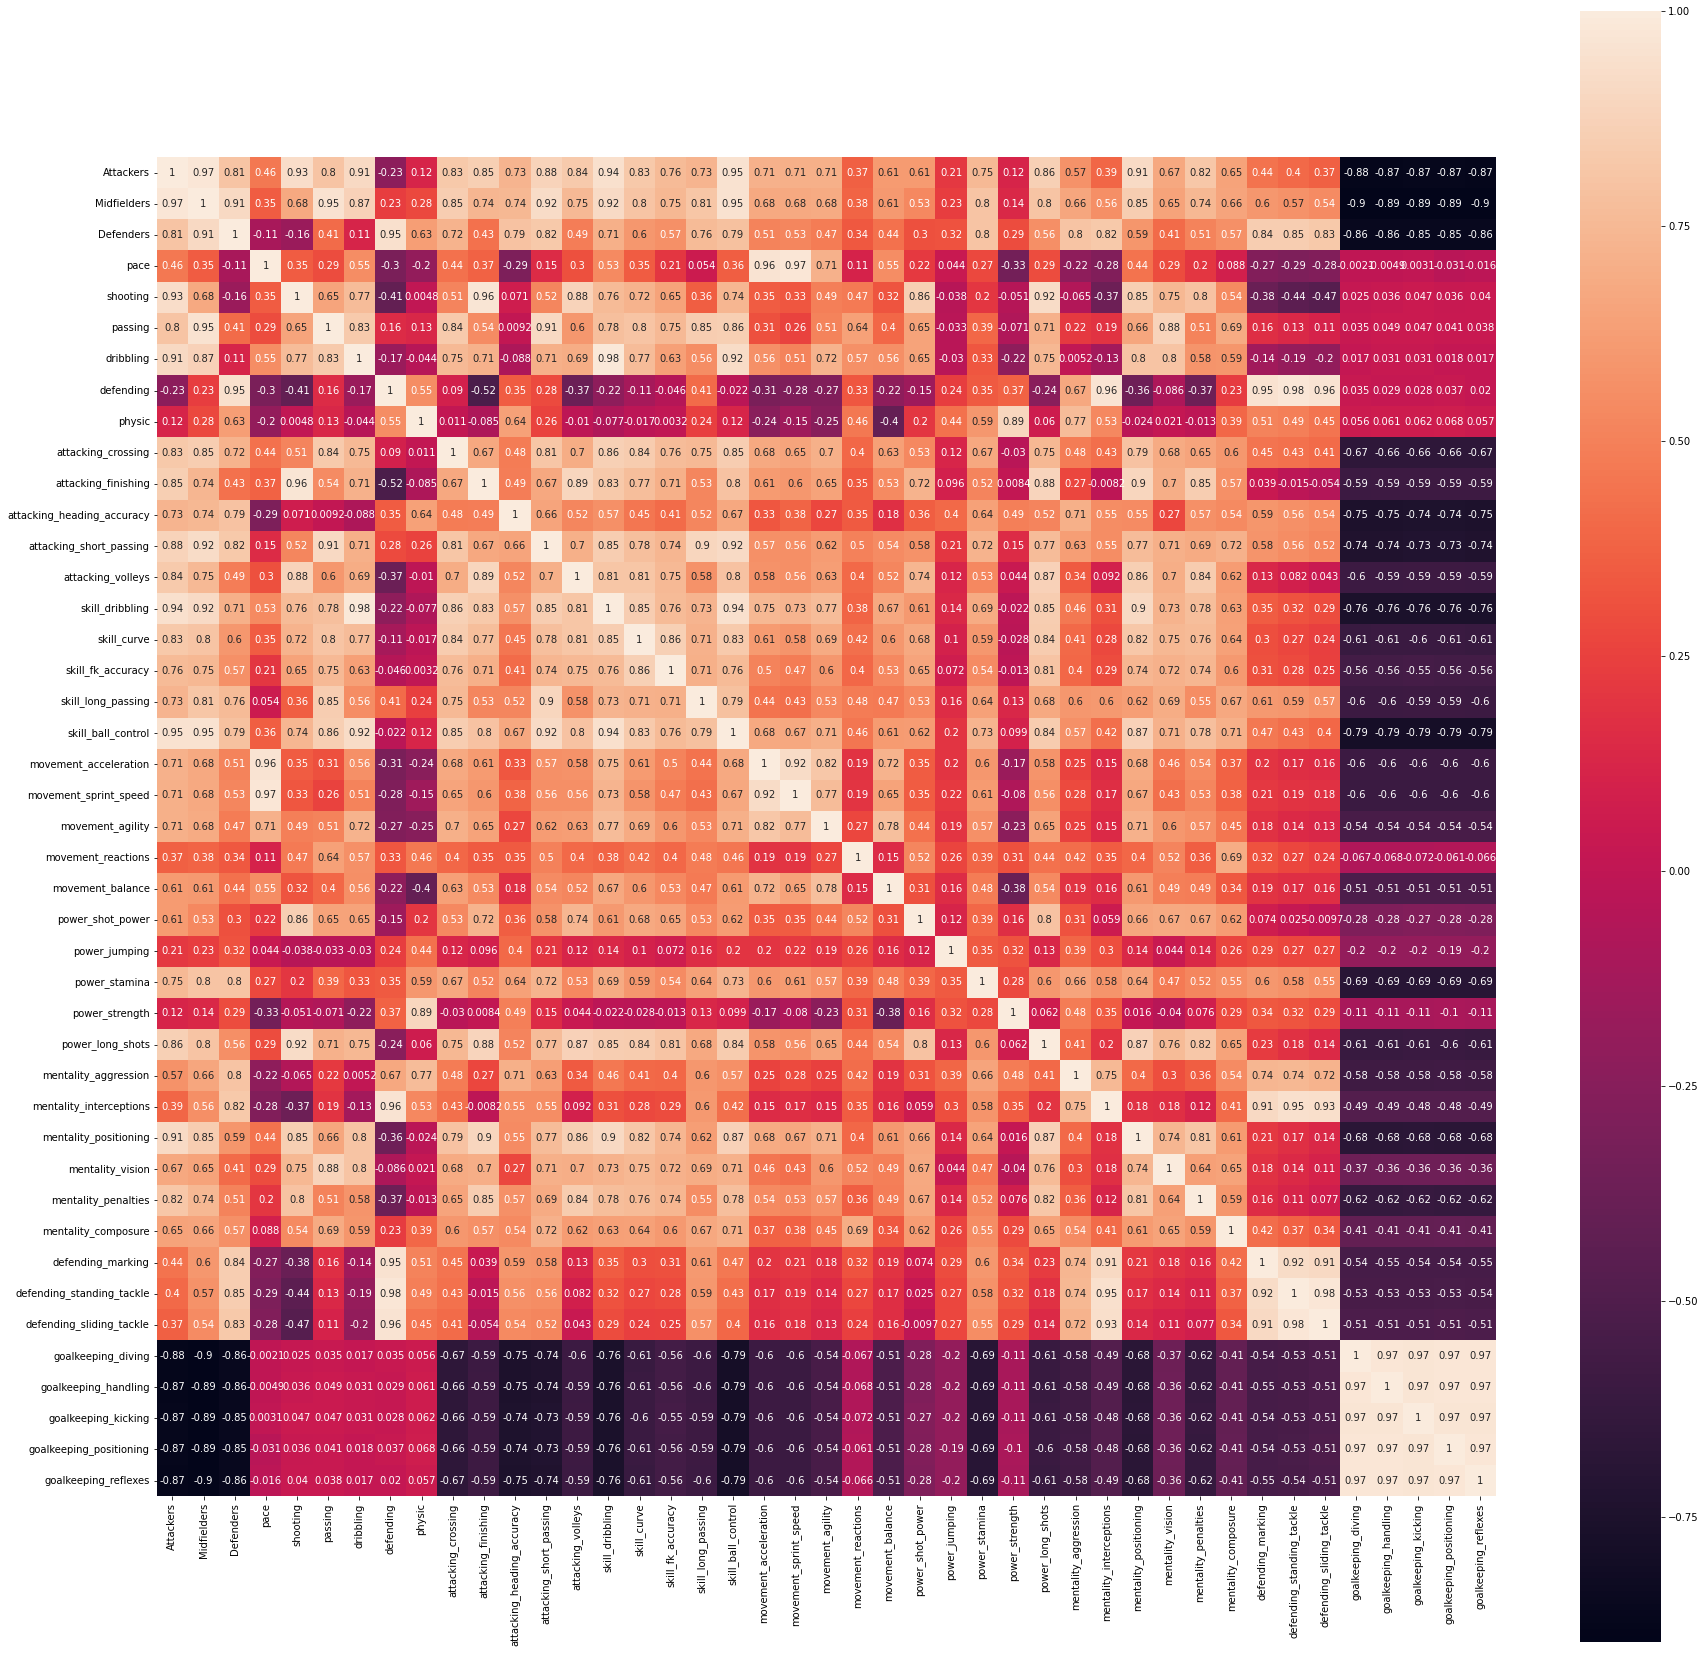

In [83]:
plt.figure(figsize=(30,30))
sns.heatmap(positional_df.corr(), annot=True, square=True)

Below are the highly collinear features w.r.t. Forwards, Midfielders & Defenders which is inline with the skill requirements of each position as seen above in the game information section:
1. **Forwards**: shooting, dribbling, ball control, positioning, short passing, long shots, volleys, crossing, curve, finishing, passing, stamina, fk accuracy, long passing, acceleration, sprint speed, agility, balance, shot power
2. **Midfielders**: passing, ball control, dribbling, short passing, long passing, balance, positioning 
3. **Defenders**: defending, short passing, interceptions, marking, standing tackle, sliding tackle, stamina, physic, aggression

Feature **'team_position'** is used only in preprocessing and analysis. It is not required in model building & hence can be dropped off.

In [84]:
df.drop(['team_position'], axis=1, inplace=True)
df.head(3)

,age,height_cm,weight_kg,potential,preferred_foot,weak_foot,skill_moves,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Attacking_work_rate,Defending_work_rate,Attackers,Midfielders,Defenders
0,32,170,72,94,0,4,4,4,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,1,0,91.0,85.230769,59.714286
1,34,187,83,93,1,4,5,4,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,2,0,90.5,80.307692,58.714286
2,27,175,68,92,1,5,5,4,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,2,1,86.5,81.307692,56.000000


In [85]:
[feature for feature in df.columns if df[feature].dtypes == 'object']

[]

Now all the features are in numeric format.

## Numeric variables

#### 1) Handling Null values

In [86]:
for feature in df.columns:
    if df[feature].isnull().sum() > 0:
        print(feature+': ', df[feature].isnull().sum())

pace:  2036
shooting:  2036
passing:  2036
dribbling:  2036
defending:  2036
physic:  2036


In [87]:
# Filling missing value with '0' in this case
for feature in df.columns:
    if df[feature].isnull().sum() > 0:
        df[feature].fillna(0, inplace=True)

In [88]:
# checking for null values now
for feature in df.columns:
    if df[feature].isnull().sum() > 0:
        print(feature+': ', df[feature].isnull().sum())

All the null values are handled now.

In [89]:
df.head()

,age,height_cm,weight_kg,potential,preferred_foot,weak_foot,skill_moves,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Attacking_work_rate,Defending_work_rate,Attackers,Midfielders,Defenders
0,32,170,72,94,0,4,4,4,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,1,0,91.0,85.230769,59.714286
1,34,187,83,93,1,4,5,4,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,2,0,90.5,80.307692,58.714286
2,27,175,68,92,1,5,5,4,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,2,1,86.5,81.307692,56.000000
3,26,188,87,93,1,3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,1,1,0.0,0.000000,0.000000
4,28,175,74,91,1,4,4,1,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,2,1,85.5,81.615385,57.285714


In [90]:
X = df.values
X

array([[ 32.        , 170.        ,  72.        , ...,  91.        ,
         85.23076923,  59.71428571],
       [ 34.        , 187.        ,  83.        , ...,  90.5       ,
         80.30769231,  58.71428571],
       [ 27.        , 175.        ,  68.        , ...,  86.5       ,
         81.30769231,  56.        ],
       ...,
       [ 19.        , 186.        ,  75.        , ...,  43.        ,
         45.61538462,  47.85714286],
       [ 18.        , 185.        ,  74.        , ...,  43.5       ,
         46.30769231,  48.42857143],
       [ 26.        , 182.        ,  78.        , ...,  42.5       ,
         46.38461538,  48.85714286]])

## Scaling the data

In [91]:
# Scaling the data: good practice to scale the data before applying clustering technique as it is a distance-based algo.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
X_scaled

array([[ 1.44233274, -1.68159832, -0.46489103, ...,  1.92250631,
         1.668331  ,  0.47867045],
       [ 1.87180879,  0.83439432,  1.0959349 , ...,  1.89797607,
         1.42165623,  0.42894684],
       [ 0.36864262, -0.94160048, -1.0324641 , ...,  1.70173414,
         1.47176204,  0.29398277],
       ...,
       [-1.34926158,  0.68639475, -0.03921123, ..., -0.43239683,
        -0.31663005, -0.11090945],
       [-1.5639996 ,  0.53839519, -0.1811045 , ..., -0.40786659,
        -0.28194141, -0.08249597],
       [ 0.15390459,  0.09439648,  0.38646857, ..., -0.45692707,
        -0.27808711, -0.06118585]])

### Principal component analysis

In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)                      # 2-D PCA for the visualization
scaled_pca = pca.fit_transform(X_scaled)

# Model Building

## A] KMeans Clustering

In [94]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_pca)
    wcss.append(kmeans.inertia_)  # inertia: distance between the centroids & all the other points

1. 'KMeans++' ensures that the initial cluster centroids initiated are far away so that we get better centroids. Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. Convergence is achieved once the re-calculated centroids match the previous iteration’s centroids, or are within some preset margin. The measure of distance is generally Euclidean in k-means.
2. Poor initialization can lead to increased numbers of required clustering iterations to reach convergence, a greater overall runtime, and a less-efficient algorithm overall.
3.  The better the initial centroid placement, generally the fewer iterations are required, and the faster and more efficient the algorithm is.

In [95]:
wcss                              # Within cluster sum of squares

[622320.7798233333,
 220823.14553657532,
 120487.73149114849,
 81694.11318543635,
 60546.504060469335,
 49200.067538748204,
 43074.579636360424,
 37423.85713226772,
 32977.28005245553,
 29528.3501486341]

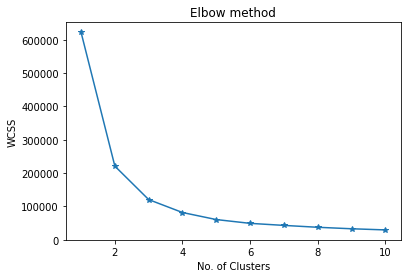

In [96]:
# To find the optimum number of clusters w.r.t. wcss using Elbow method
plt.plot(range(1,11), wcss, marker='*')
plt.title("Elbow method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()

As per the graph above, a sharp bend is seen at k=2. While for k values above 3, the change in wcss is very less. We can check the silhouette score for both the values within this range to select the optimum k value(no. of clusters).

In [97]:
# k=3
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
prediction = kmeans.fit_predict(scaled_pca)
prediction

array([0, 2, 0, ..., 3, 3, 3])

In [98]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(scaled_pca, kmeans.labels_)
sil_score

0.4487639640797804

In [99]:
scaled_pca[prediction == 0]              # points/rows of 0th cluster

array([[-10.06384646,  -5.58166768],
       [ -9.40835459,  -6.36703901],
       [ -9.00474314,  -5.21759631],
       ...,
       [  3.05902271,  -2.91346347],
       [  2.23827394,  -1.73955456],
       [  2.78016476,  -3.32736278]])

In [100]:
scaled_pca[prediction == 0,0]            # x-coordinate of points of 0th cluster

array([-10.06384646,  -9.40835459,  -9.00474314, ...,   3.05902271,
         2.23827394,   2.78016476])

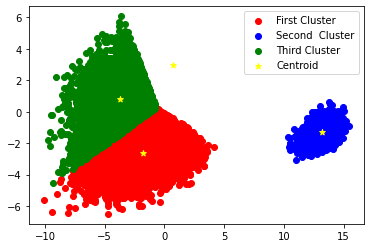

In [101]:
plt.scatter(scaled_pca[prediction == 0,0], scaled_pca[prediction == 0,1], c='red', label='First Cluster')
plt.scatter(scaled_pca[prediction == 1,0], scaled_pca[prediction == 1,1], c='blue', label='Second  Cluster')
plt.scatter(scaled_pca[prediction == 2,0], scaled_pca[prediction == 2,1], c='green', label='Third Cluster')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='*', c='yellow', label='Centroid')
plt.legend()

In [102]:
# k=2
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
prediction = kmeans.fit_predict(scaled_pca)
sil_score = silhouette_score(scaled_pca, kmeans.labels_)
sil_score

0.45839087949503066

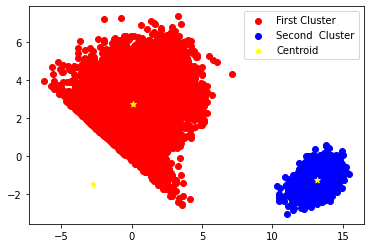

In [103]:
plt.scatter(scaled_pca[prediction == 0,0], scaled_pca[prediction == 0,1], c='red', label='First Cluster')
plt.scatter(scaled_pca[prediction == 1,0], scaled_pca[prediction == 1,1], c='blue', label='Second  Cluster')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='*', c='yellow', label='Centroid')
plt.legend()

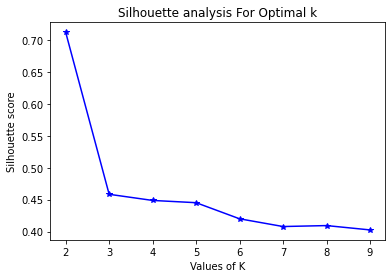

In [104]:
# To find optimal k value w.r.t. silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(scaled_pca)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(scaled_pca, cluster_labels))

# Visualize the silhouette score for each cluster value in 'range_n_clusters'
plt.plot(range_n_clusters, silhouette_avg, 'b*-')
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

As we can see, k=2 yields the best result.

**KMeans clustering with 2 clusters** gives silhouette score of **71.25%**.

## B] DBSCAN

1. MinPts: As a rule of thumb, a minimum minPts can be derived from the number of dimensions D in the data set, as minPts ≥ D + 1. 
2. The low value of minPts = 1 does not make sense, as then every point on its own will already be a cluster. With minPts ≤ 2, the result will be the same as of hierarchical clustering with the single link metric, with the dendrogram cut at height ε. 3. Therefore, minPts must be chosen at least 3. However, larger values are usually better for data sets with noise and will yield more significant clusters. 
4. As a rule of thumb, minPts = 2.dim can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates.
5. Here, MinPts taken is 4.

In [105]:
# To find the epsilon value for a specific MinPts
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4, metric='minkowski', p=2)      # n_neighbors=MinPts. As no. of features(D) after PCA = 2.
nbrs = neigh.fit(scaled_pca)
distances, indices = nbrs.kneighbors(scaled_pca)

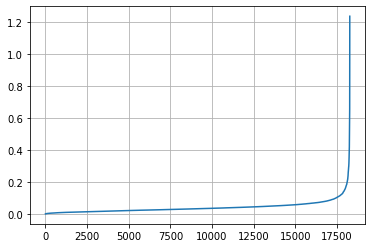

In [106]:
# to plot a graph between 
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()

In [107]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.25, min_samples=4).fit(scaled_pca)
labels = db.labels_

In [108]:
labels

array([-1, -1, -1, ...,  1,  1,  1], dtype=int64)

In [109]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [110]:
len(set(labels))

17

In [111]:
n_clusters_ = len(set(labels)) - 1   # Number of clusters in labels, ignoring noise
n_noise_ = list(labels).count(-1)    # counting number of noise points (cluster label: -1) from the list of all labels

In [112]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Silhouette Coefficient:", silhouette_score(scaled_pca, labels))

Estimated number of clusters: 16
Estimated number of noise points: 211
Silhouette Coefficient: -0.03927227844378681


In [113]:
db = DBSCAN(eps=0.3, min_samples=4).fit(scaled_pca)
labels = db.labels_
n_clusters_ = len(set(labels)) - 1 
n_noise_ = list(labels).count(-1) 

In [114]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Silhouette Coefficient:", silhouette_score(scaled_pca, labels))

Estimated number of clusters: 9
Estimated number of noise points: 128
Silhouette Coefficient: -0.039779680655449776


In [115]:
db = DBSCAN(eps=0.4, min_samples=4).fit(scaled_pca)
labels = db.labels_
n_clusters_ = len(set(labels)) - 1 
n_noise_ = list(labels).count(-1) 

In [116]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Silhouette Coefficient:", silhouette_score(scaled_pca, labels))

Estimated number of clusters: 2
Estimated number of noise points: 64
Silhouette Coefficient: 0.4683921345473392


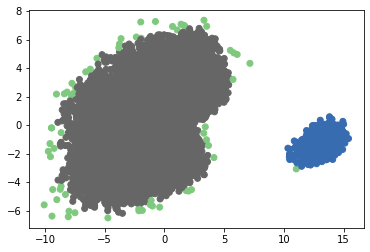

In [117]:
plt.scatter(scaled_pca[:, 0], scaled_pca[:,1], c = labels, cmap='Accent') # plotting the clusters
plt.show()

In [118]:
db = DBSCAN(eps=0.5, min_samples=4).fit(scaled_pca)
labels = db.labels_
n_clusters_ = len(set(labels)) - 1 
n_noise_ = list(labels).count(-1)

In [119]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Silhouette Coefficient:", silhouette_score(scaled_pca, labels))

Estimated number of clusters: 2
Estimated number of noise points: 36
Silhouette Coefficient: 0.4911741919086845


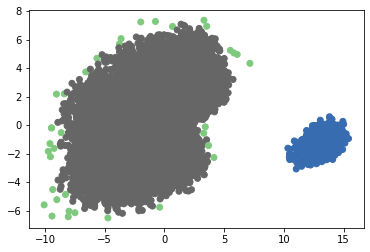

In [120]:
plt.scatter(scaled_pca[:, 0], scaled_pca[:,1], c = labels, cmap='Accent') # plotting the clusters
plt.show()

In [121]:
db = DBSCAN(eps=0.5, min_samples=5).fit(scaled_pca)
labels = db.labels_
n_clusters_ = len(set(labels)) - 1 
n_noise_ = list(labels).count(-1)

In [122]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Silhouette Coefficient:", silhouette_score(scaled_pca, labels))

Estimated number of clusters: 2
Estimated number of noise points: 37
Silhouette Coefficient: 0.4917548880343877


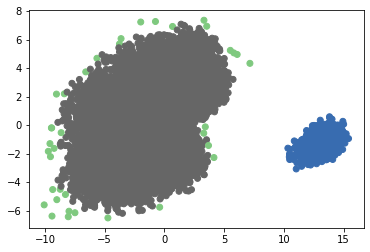

In [123]:
plt.scatter(scaled_pca[:, 0], scaled_pca[:,1], c = labels, cmap='Accent') # plotting the clusters
plt.show()

In [124]:
db = DBSCAN(eps=0.7, min_samples=5).fit(scaled_pca)
labels = db.labels_
n_clusters_ = len(set(labels)) - 1 
n_noise_ = list(labels).count(-1)

In [125]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Silhouette Coefficient:", silhouette_score(scaled_pca, labels))

Estimated number of clusters: 2
Estimated number of noise points: 12
Silhouette Coefficient: 0.5478268184427563


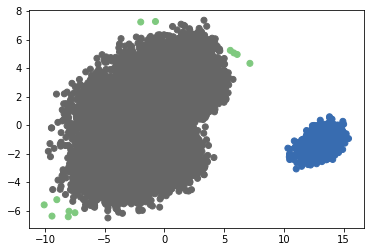

In [126]:
plt.scatter(scaled_pca[:, 0], scaled_pca[:,1], c = labels, cmap='Accent') # plotting the clusters
plt.show()

In [127]:
db = DBSCAN(eps=0.8, min_samples=4).fit(scaled_pca)
labels = db.labels_
n_clusters_ = len(set(labels)) - 1 
n_noise_ = list(labels).count(-1) 

In [128]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Silhouette Coefficient:", silhouette_score(scaled_pca, labels))

Estimated number of clusters: 2
Estimated number of noise points: 5
Silhouette Coefficient: 0.5461264917619749


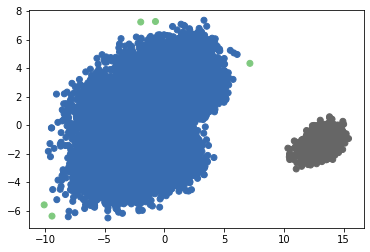

In [129]:
plt.scatter(scaled_pca[:, 0], scaled_pca[:,1], c = labels, cmap='Accent') # plotting the clusters
plt.show()

In [130]:
db = DBSCAN(eps=1, min_samples=5).fit(scaled_pca)
labels = db.labels_
n_clusters_ = len(set(labels)) - 1 
n_noise_ = list(labels).count(-1)  

In [131]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Silhouette Coefficient:", silhouette_score(scaled_pca, labels))

Estimated number of clusters: 2
Estimated number of noise points: 4
Silhouette Coefficient: 0.5648569258758906


In [132]:
db = DBSCAN(eps=1, min_samples=10).fit(scaled_pca)
labels = db.labels_
n_clusters_ = len(set(labels)) - 1 
n_noise_ = list(labels).count(-1)  

In [133]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Silhouette Coefficient:", silhouette_score(scaled_pca, labels))

Estimated number of clusters: 2
Estimated number of noise points: 8
Silhouette Coefficient: 0.5487959790303476


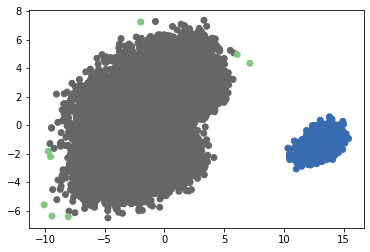

In [134]:
plt.scatter(scaled_pca[:, 0], scaled_pca[:,1], c = labels, cmap='Accent') # plotting the clusters
plt.show()

In [135]:
db = DBSCAN(eps=0.7, min_samples=10).fit(scaled_pca)
labels = db.labels_
n_clusters_ = len(set(labels)) - 1 
n_noise_ = list(labels).count(-1)  

In [136]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Silhouette Coefficient:", silhouette_score(scaled_pca, labels))

Estimated number of clusters: 2
Estimated number of noise points: 24
Silhouette Coefficient: 0.5224114018194722


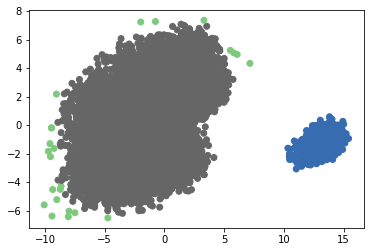

In [137]:
plt.scatter(scaled_pca[:, 0], scaled_pca[:,1], c = labels, cmap='Accent') # plotting the clusters
plt.show()

In [138]:
db = DBSCAN(eps=0.6, min_samples=6).fit(scaled_pca)
labels = db.labels_
n_clusters_ = len(set(labels)) - 1 
n_noise_ = list(labels).count(-1)  

In [139]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Silhouette Coefficient:", silhouette_score(scaled_pca, labels))

Estimated number of clusters: 2
Estimated number of noise points: 24
Silhouette Coefficient: 0.5189430323495526


DBSCAN clustering with **epsilon=1** & **min_samples=5** gives a better silhouette score of **56.48%** compared to other values.

## C] Hierarchical Clustering

* There are 2 approaches in Hierarchical clustering: **Agglomerative (bottom-up)** & **Divisive (top-down)**.
* here, we'll be using Agglomerative clustering approach.

1. The hierarchy module of scipy library provides us a method **shc.dendrogram()**, which takes the linkage() as a parameter. 
2. The linkage function is used to define the distance between two clusters, so here we have passed our scaled_pca, and method **"ward"** the popular method of linkage in hierarchical clustering. It reduces the variance in each cluster.

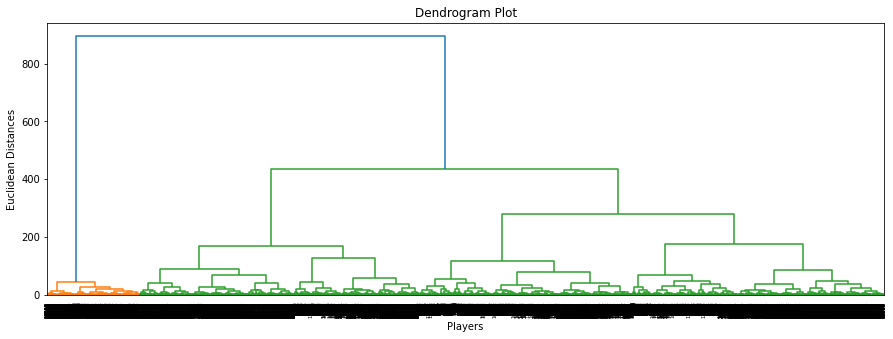

In [140]:
# Finding the optimal number of clusters using a dendrogram  

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15,5))
dendrogram = shc.dendrogram(shc.linkage(scaled_pca, method="ward"))  # linkage: It defines the linkage criteria
plt.title("Dendrogram Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Players")  
plt.show()  

1. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 600 and cut the dendrogram. The no. of clusters as per this intersection will be 2.
2. Or, we can cut the dendrogram at a distance of 400 which will give 3 clusters. Let's check for either of the cases.

In [141]:
from sklearn.cluster import AgglomerativeClustering  
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') # affinity: metric used to compute the linkage.
pred = hc.fit_predict(scaled_pca)
silhouette_score(scaled_pca, pred)

0.4330672379217988

In [142]:
hc = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average')  
pred = hc.fit_predict(scaled_pca)
silhouette_score(scaled_pca, pred)

0.5289260022713334

In [143]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
pred = hc.fit_predict(scaled_pca)
silhouette_score(scaled_pca, pred)

0.7125801596845822

In [144]:
hc = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')  
pred = hc.fit_predict(scaled_pca)
silhouette_score(scaled_pca, pred)

0.7125422683303204

In [145]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
pred = hc.fit_predict(scaled_pca)
silhouette_score(scaled_pca, pred)

0.418353354314444

Hierarchical clustering with **2 clusters** with **affinity='euclidean'** & **linkage='ward'** yields **71.26%** silhouette score.

1. For this dataset & problem, DBSCAN doesn't yield a good result. 
2. Whereas, **KMeans clustering** with 2 clusters & **Hierarchical clustering** with 2 clusters(affinity=euclidean & linkage=ward) gives a good silhouette score of **71.25%** & **71.26%** resp.